#K Means Clustering

In [1]:
#Libraries required for my code to run

#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib notebook 
#Uncomment this if you want to display your graphs in backend
#%matplotlib

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from pandas import DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn



1.Synthetic Data Generation first method

<IPython.core.display.Javascript object>


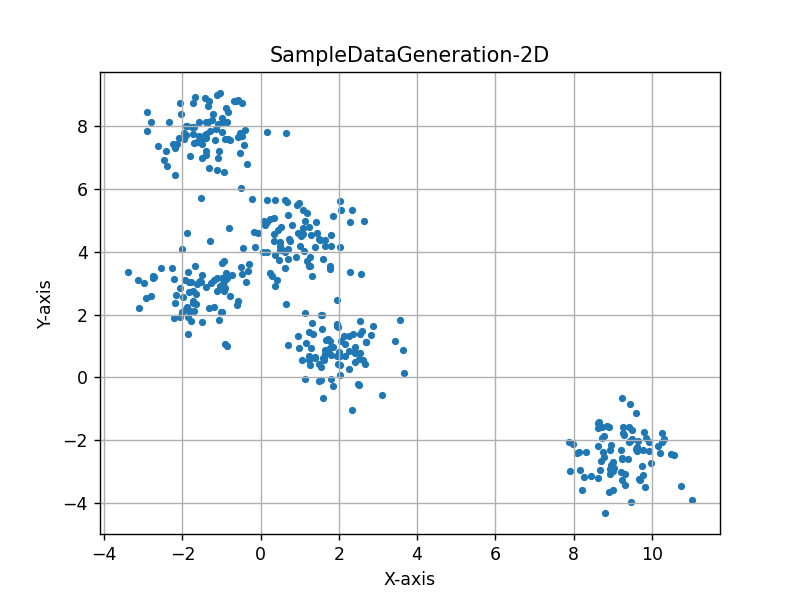

<IPython.core.display.Javascript object>


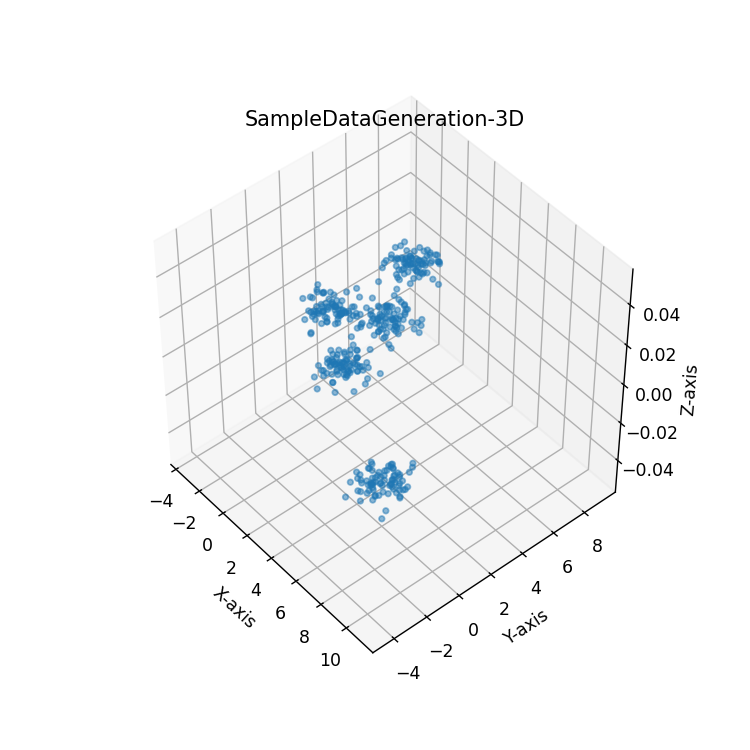

In [4]:
#Synthetic Data Generation first method

K=5 # Step1:Choose the Number of clusters
#%matplotlib
from sklearn.datasets.samples_generator import make_blobs
Data, y_true = make_blobs(n_samples=400, centers=K,
                       cluster_std=0.70, random_state=0)
#Plot 2D
plt.scatter(Data[:, 0], Data[:, 1], s=10)
plt.title("SampleDataGeneration-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()

    #Choose Initial Centroids with all the possible combination of samples starting from rseed=42
rng = np.random.RandomState(42)
i = rng.permutation(Data.shape[0])[:K]
centers = Data[i] 
  
#plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50)
#plt.title("SampleDataGeneration-2D")
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.grid()

#3D Plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Data[:, 0],Data[:, 1],
           linewidths=1, alpha=0.5,
           #edgecolor='k',
           s =10,
           )
ax.set_title("SampleDataGeneration-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()           

#I am ignoring the trivial warnings here...
import warnings
warnings.filterwarnings('ignore')


In [5]:
def EuclideanDistance(Dataset,Centroids):
    from sklearn.metrics import pairwise_distances_argmin
    labels=pairwise_distances_argmin(Dataset,Centroids)
    return labels  
    

In [8]:


def Kmeans(X, clusters, rseed=3):
    # Step2. Randomly choose initial Centroids
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:clusters]
    Initial_Centroids = X[i]  
    #print("Initial Centroids are:\n",Initial_Centroids)
    #I am capturing dataset in excel.Making sure if that already exists.If exists,overwrite
    #If not,create new
    import glob
    #fileList = glob.glob('C:\dataset*.xlsx')
    j=0
    while True:
        print("Iteration",j)
        # Step2a: Assign labels to datapoints or assign datapoints
        #to cluster based on minimum distance to the closest-centeroid
        
        labels = EuclideanDistance(X,Initial_Centroids)
        
        
        df = pd.DataFrame(data=X, columns=["X", "Y"])
        
        df['Cluster']=labels
        #Capturing my data in excel.Whoevere uses this give the path name as per your sytem settings
        #Validation part.uncomment below line.
        #df.to_excel (r'C:\dataset'+str(j)+'.xlsx', index = True, header=True)
       
        # Step3: Find new centeroids by calculating
        # Means of Datapoints belonging to the same cluster 
        
        New_Centroids = np.array([X[labels == i].mean(0)
                                for i in range(clusters)])
        #print("New_Centroids\n",New_Centroids)
        df1 = pd.DataFrame(data=New_Centroids, columns=["X", "Y"])
         #Capturing my centroids in excel.Whoevere uses this give the path name as per your sytem settings
        #Validation part.uncomment below line.
        #df1.to_excel (r'C:\Centroids'+str(j)+'.xlsx', index = True, header=True)
        
        # Step4: Check if previous-centroids and new-centroids are equal
        #print(centers)
        #print(new_centers)
        if np.all(Initial_Centroids == New_Centroids):
            break
        j=j+1    
        Initial_Centroids = New_Centroids
    
    return New_Centroids, labels

Codebook, labels = Kmeans(Data, K)
#print(centers)
#print(labels)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14


<IPython.core.display.Javascript object>


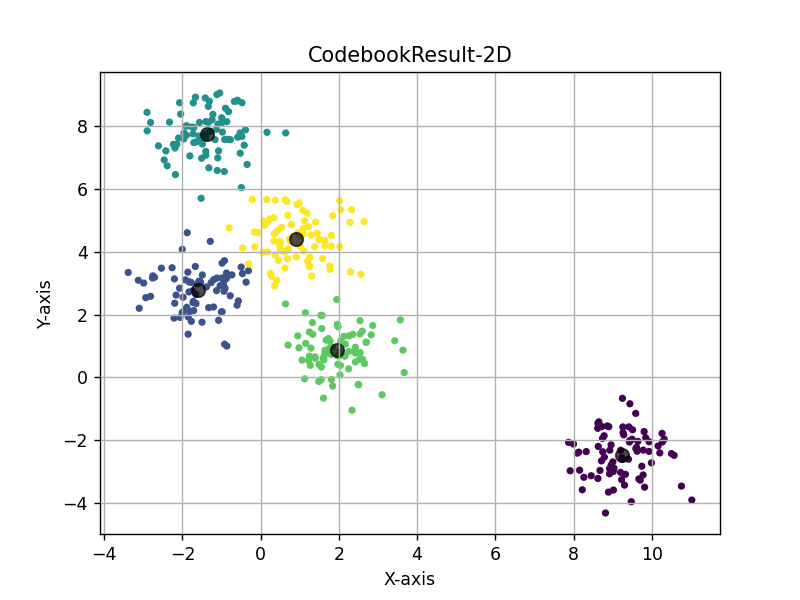

In [9]:
#Plot 2D for visualization

plt.scatter(Data[:, 0], Data[:, 1],s=10,c=labels,cmap='viridis');
plt.scatter(Codebook[:, 0], Codebook[:, 1], c='Black', s=60, alpha=0.7);
plt.title("CodebookResult-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()

<IPython.core.display.Javascript object>


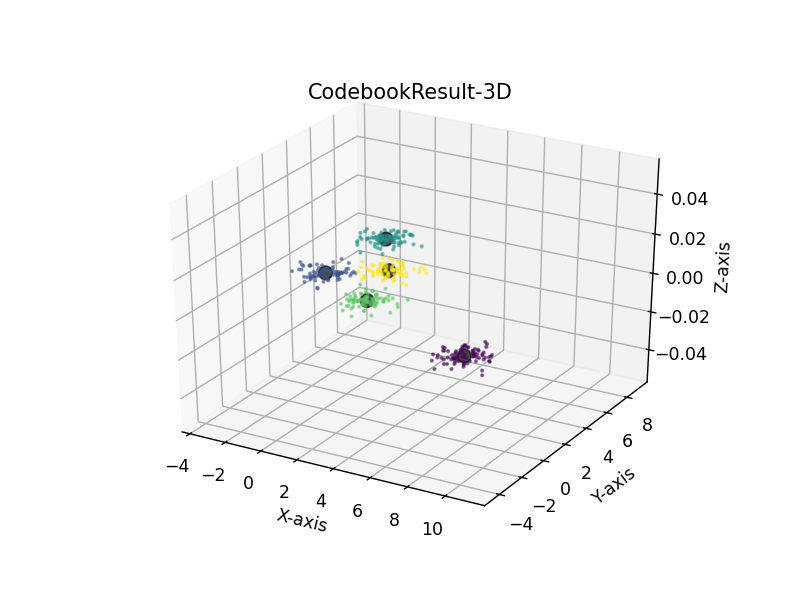

In [10]:
#Plot 3D for visualization
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(Data[:, 0], Data[:, 1], c=labels,linewidths=1,
            s=2, cmap='viridis',alpha=0.5)
ax.scatter(Codebook[:, 0], Codebook[:, 1], c='Black', s=60, alpha=0.7);
ax.set_title("CodebookResult-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()
#print(Codebook)

Method2: Synthetic Data Generation

<IPython.core.display.Javascript object>


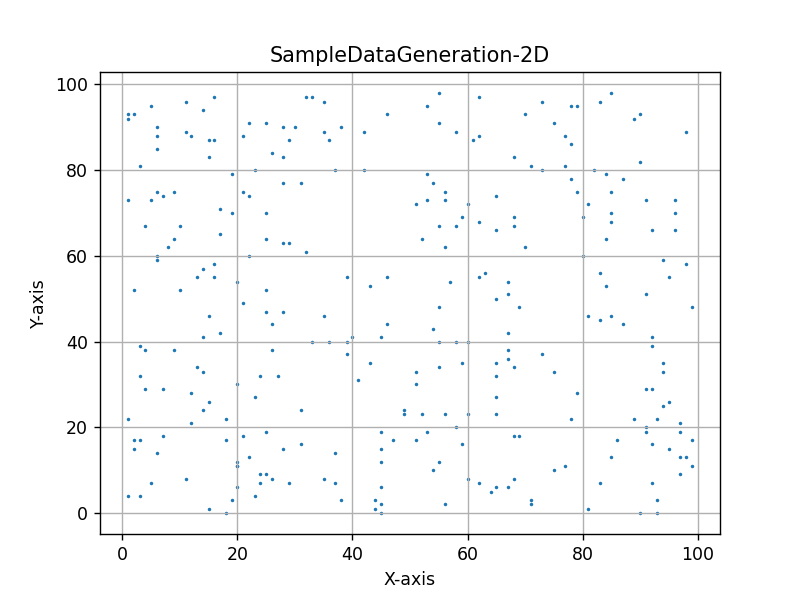

In [11]:
K=5 #Choose Clusters
#2 features/columns
%matplotlib notebook
x=np.random.randint(100,size=(300,1))
y=np.random.randint(100,size=(300,1))
#z=np.random.randint(100,size=(10,1))
Df = {'X': x[:,0],
        'Y': y[:,0],
        #'Z': z[:,0]
       
       }
Df = DataFrame(Df,columns=['X','Y'])

Data=Df.to_numpy()

#Plot 2D

plt.scatter(Data[:,0], Data[:,1],s=1)
#Plot/Show Initial Centroids 
#centers = Df.sample(K)

#plt.scatter(centers['X'], centers['Y'],c='red', s=50)
plt.title("SampleDataGeneration-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()



<IPython.core.display.Javascript object>


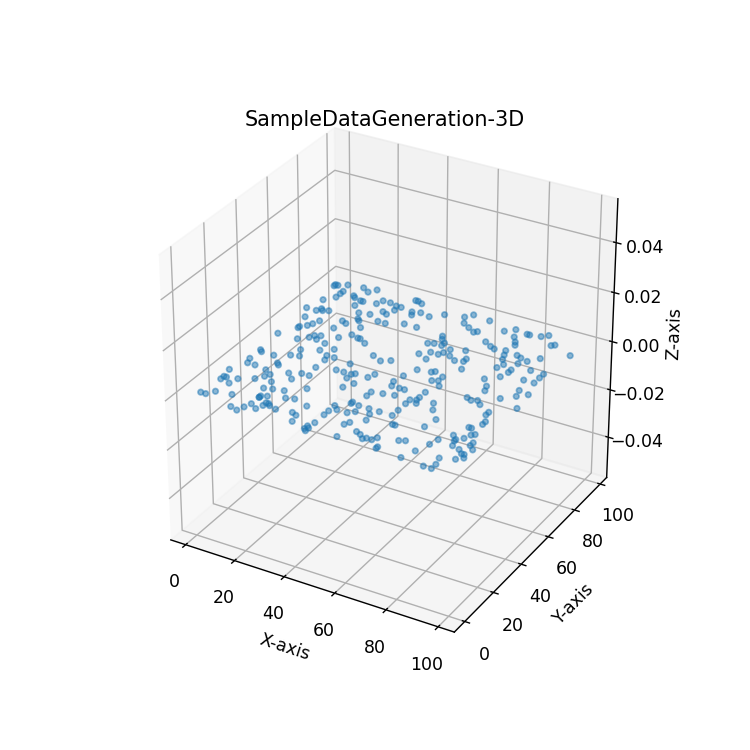

In [12]:
#Plot 3D
#%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Data[:,0],Data[:,1],
           linewidths=1,
           alpha=0.5,
           s =10,
           )
ax.set_title("SampleDataGeneration-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13


<IPython.core.display.Javascript object>


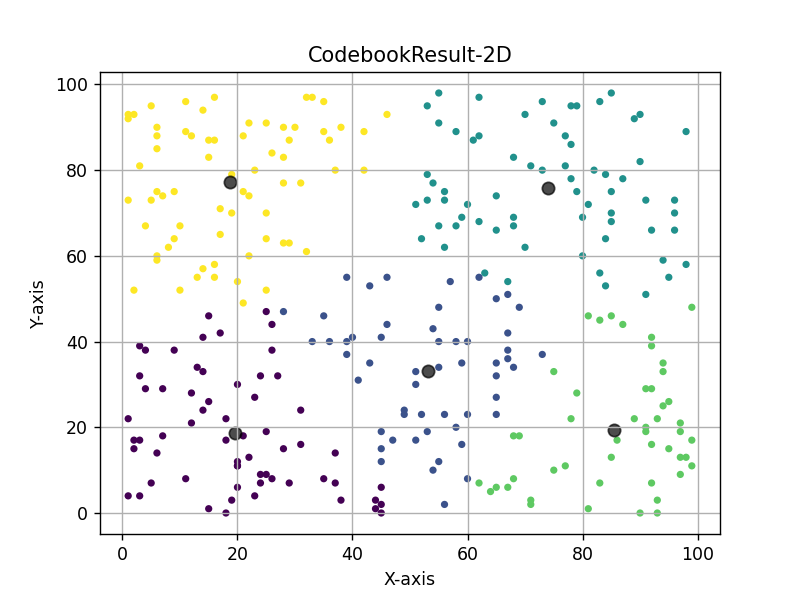

In [13]:

Codebook, labels = Kmeans(Data, K)
plt.scatter(Data[:, 0], Data[:, 1],s=10,c=labels,cmap='viridis');
plt.scatter(Codebook[:, 0], Codebook[:, 1], c='Black', s=50, alpha=0.7);
plt.title("CodebookResult-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()

<IPython.core.display.Javascript object>


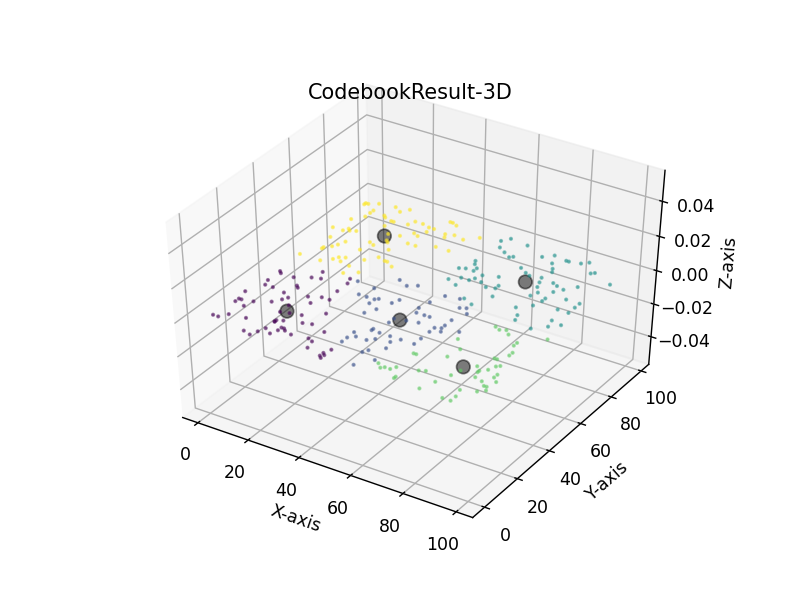

In [14]:
#Plot 3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(Data[:, 0], Data[:, 1], c=labels,linewidths=1,
            s=2, cmap='viridis',alpha=0.5)
ax.scatter(Codebook[:, 0], Codebook[:, 1], c='Black', s=60, alpha=0.5);
ax.set_title("CodebookResult-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()
#print(Codebook)